# numpy
    Biblioteca de processamento numérico (normalmente usada por debaixo dos panos)
# pandas
    Processamento de tabelas
    Comandos básicos
    Pegar linhas, pegar colunas, filtrar linhas
# matplotlib
    Biblioteca pra plot de dados
    (mostrar um pouco do que vai ser possível com vídeo)
    2 jeitos diferentes de programar
        máquina de estados - Fácil de fazer coisas simples. Pouco controle
        orientado a objetos - Mais difícil de fazer coisas simples. Muito mais Controle

In [2]:
import pandas as pd

In [40]:
df = pd.read_csv("countries-aggregated.csv")

In [41]:
# df tem 3 colunas, o valor atual de casos confirmados, recuperações e mortes pra cada data
df

Date      Country  Confirmed  Recovered  Deaths
0      2020-01-22  Afghanistan          0          0       0
1      2020-01-23  Afghanistan          0          0       0
2      2020-01-24  Afghanistan          0          0       0
3      2020-01-25  Afghanistan          0          0       0
4      2020-01-26  Afghanistan          0          0       0
...           ...          ...        ...        ...     ...
67227  2021-01-03     Zimbabwe      15265      11574     380
67228  2021-01-04     Zimbabwe      15829      11716     384
67229  2021-01-05     Zimbabwe      17194      11813     418
67230  2021-01-06     Zimbabwe      17804      11966     431
67231  2021-01-07     Zimbabwe      18675      12083     446

[67232 rows x 5 columns]

# Qual a maior e menor data da nossa tabela?

In [42]:
df["Date"]

0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
67227    2021-01-03
67228    2021-01-04
67229    2021-01-05
67230    2021-01-06
67231    2021-01-07
Name: Date, Length: 67232, dtype: object

In [43]:
# Convertendo nossas strings de data pro tipo data do pandas
df["Date"] = pd.to_datetime(df["Date"])

In [44]:
print(df["Date"].min())
print(df["Date"].max())

2020-01-22 00:00:00
2021-01-07 00:00:00


## Quantos filtrar casos de um único país

In [46]:
# Gerar uma series de booleanos pra filtrar a tabela
df['Country']=='Brazil'

0        False
1        False
2        False
3        False
4        False
         ...  
67227    False
67228    False
67229    False
67230    False
67231    False
Name: Country, Length: 67232, dtype: bool

In [47]:
df_brazil = df[df['Country']=='Brazil']

In [51]:
# Ordenando a tabela a partir de uma coluna
df_brazil.sort_values(by="Date", ascending=False)

Date Country  Confirmed  Recovered  Deaths
8447 2021-01-07  Brazil    7961673    7081521  200498
8446 2021-01-06  Brazil    7873830    7033286  198974
8445 2021-01-05  Brazil    7810400    6994845  197732
8444 2021-01-04  Brazil    7753752    6950045  196561
8443 2021-01-03  Brazil    7733746    6904172  196018
...         ...     ...        ...        ...     ...
8100 2020-01-26  Brazil          0          0       0
8099 2020-01-25  Brazil          0          0       0
8098 2020-01-24  Brazil          0          0       0
8097 2020-01-23  Brazil          0          0       0
8096 2020-01-22  Brazil          0          0       0

[352 rows x 5 columns]

## Quais os países na lista?

In [52]:
df["Country"]

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
67227       Zimbabwe
67228       Zimbabwe
67229       Zimbabwe
67230       Zimbabwe
67231       Zimbabwe
Name: Country, Length: 67232, dtype: object

In [54]:
# Operações podem retornar objetos do numpy
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

## Quantas vezes cada país aparece na tabela?

In [62]:
# Comando groupby seleciona colunas em que vai ser aplicada operação de agrupamento
df.groupby("Country")

In [63]:
# Operação Count conta quantas vezes cada elemento da coluna selecionada aparece. Ele copia esse número em todas as colunas
df.groupby("Country").count()

Date  Confirmed  Recovered  Deaths
Country                                               
Afghanistan          352        352        352     352
Albania              352        352        352     352
Algeria              352        352        352     352
Andorra              352        352        352     352
Angola               352        352        352     352
...                  ...        ...        ...     ...
Vietnam              352        352        352     352
West Bank and Gaza   352        352        352     352
Yemen                352        352        352     352
Zambia               352        352        352     352
Zimbabwe             352        352        352     352

[191 rows x 4 columns]

In [64]:
# Pegando somente uma das colunas
df.groupby("Country").count()["Date"]

Country
Afghanistan           352
Albania               352
Algeria               352
Andorra               352
Angola                352
                     ... 
Vietnam               352
West Bank and Gaza    352
Yemen                 352
Zambia                352
Zimbabwe              352
Name: Date, Length: 191, dtype: int64

## Qual a linha mais recente de cada país?

In [75]:
# Agrupar por país. Selecionar coluna 'Data'
#  Groupby seleciona em cima de qual coluna vão ser os grupos.
#  Selecionar coluna em cima da qual a operação de agrupamento vai atuar (poderia ser soma, contagem, no caso é escolher o maior valor)
indices = df.groupby("Country")['Date'].idxmax()


In [76]:
# Pegar as linhas cujos índices são de maior valor por grupo
df.loc[indices]

Date             Country  Confirmed  Recovered  Deaths
351   2021-01-07         Afghanistan      53207      43291    2253
703   2021-01-07             Albania      61705      36535    1223
1055  2021-01-07             Algeria     101382      68589    2792
1407  2021-01-07             Andorra       8348       7615      84
1759  2021-01-07              Angola      17974      11955     413
...          ...                 ...        ...        ...     ...
65823 2021-01-07             Vietnam       1509       1353      35
66175 2021-01-07  West Bank and Gaza     145252     127495    1536
66527 2021-01-07               Yemen       2104       1405     610
66879 2021-01-07              Zambia      24297      19980     423
67231 2021-01-07            Zimbabwe      18675      12083     446

[191 rows x 5 columns]

## Quais países tem o maior número total de casos? 

In [79]:
df.loc[indices].sort_values(by="Confirmed", ascending=False)

Date           Country  Confirmed  Recovered  Deaths
62655 2021-01-07                US   21574043          0  365208
28159 2021-01-07             India   10413417   10037398  150570
8447  2021-01-07            Brazil    7961673    7081521  200498
49983 2021-01-07            Russia    3297833    2681373   59628
64063 2021-01-07    United Kingdom    2898052       6520   78632
...          ...               ...        ...        ...     ...
55615 2021-01-07   Solomon Islands         17         10       0
36959 2021-01-07        MS Zaandam          9          7       2
39423 2021-01-07  Marshall Islands          4          4       0
51743 2021-01-07             Samoa          2          2       0
65119 2021-01-07           Vanuatu          1          1       0

[191 rows x 5 columns]

# Plotando com pandas

In [131]:
# Necessário pro jupyterlab
%matplotlib inline

## Visualizar os países com maior número de casos

In [132]:
# Queremos os top 20 em mortes
df_to_plot = df.loc[indices].sort_values(by="Confirmed", ascending=False)[:20]
df_to_plot = df_to_plot[['Country','Confirmed']] # Seleciona somente as colunas de país e mortes
df_to_plot

Country  Confirmed
62655              US   21574043
28159           India   10413417
8447           Brazil    7961673
49983          Russia    3297833
64063  United Kingdom    2898052
22175          France    2763370
62303          Turkey    2296102
30271           Italy    2220361
57023           Spain    2024904
23583         Germany    1886561
13375        Colombia    1737347
2463        Argentina    1690006
40479          Mexico    1493569
48575          Poland    1356882
28863            Iran    1268263
56319    South Africa    1170590
63359         Ukraine    1133802
47871            Peru    1022018
43647     Netherlands     862805
28511       Indonesia     797723

In [136]:
df_to_plot.sort_values(by='Confirmed', ascending=False).plot.bar(x='Country')

## Visualizar países com maior número de mortes

In [139]:
df_to_plot = df.loc[indices].sort_values(by="Deaths", ascending=False)
df_to_plot

Date           Country  Confirmed  Recovered  Deaths
62655 2021-01-07                US   21574043          0  365208
8447  2021-01-07            Brazil    7961673    7081521  200498
28159 2021-01-07             India   10413417   10037398  150570
40479 2021-01-07            Mexico    1493569    1127471  131031
64063 2021-01-07    United Kingdom    2898052       6520   78632
...          ...               ...        ...        ...     ...
17951 2021-01-07          Dominica        105         93       0
24639 2021-01-07           Grenada        127        107       0
26751 2021-01-07          Holy See         27         15       0
39423 2021-01-07  Marshall Islands          4          4       0
33791 2021-01-07              Laos         41         40       0

[191 rows x 5 columns]

In [143]:
df_to_plot = df_to_plot[['Country','Deaths']]
df_to_plot

Country  Deaths
62655                US  365208
8447             Brazil  200498
28159             India  150570
40479            Mexico  131031
64063    United Kingdom   78632
...                 ...     ...
17951          Dominica       0
24639           Grenada       0
26751          Holy See       0
39423  Marshall Islands       0
33791              Laos       0

[191 rows x 2 columns]

In [144]:
df_to_plot = df_to_plot[:20]

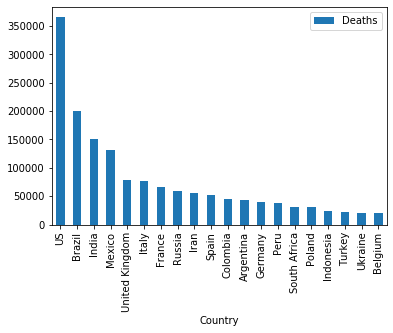

In [146]:
df_to_plot.sort_values(by='Deaths', ascending=False).plot.bar(x='Country')

## Quantos % aconteceu em cada país?

In [150]:
total = df_to_plot['Deaths'].sum()
total

1551371

In [152]:
df_to_plot['Per_deaths'] = df_to_plot['Deaths']/total

/home/mazza/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
df_to_plot

Country  Deaths  Per_deaths
62655              US  365208    0.235410
8447           Brazil  200498    0.129239
28159           India  150570    0.097056
40479          Mexico  131031    0.084461
64063  United Kingdom   78632    0.050685
30271           Italy   77291    0.049821
22175          France   66700    0.042994
49983          Russia   59628    0.038436
28863            Iran   55933    0.036054
57023           Spain   51675    0.033309
13375        Colombia   45067    0.029050
2463        Argentina   44122    0.028441
23583         Germany   38987    0.025131
47871            Peru   37925    0.024446
56319    South Africa   31809    0.020504
48575          Poland   30241    0.019493
28511       Indonesia   23520    0.015161
62303          Turkey   22264    0.014351
63359         Ukraine   20334    0.013107
5983          Belgium   19936    0.012851

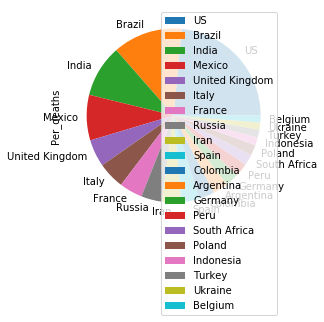

In [162]:
df_to_plot.set_index("Country", inplace=True)
df_to_plot[['Per_deaths']].plot.pie(y='Per_deaths')

# Matplotlib

## Como ter mais controle sobre os plots do pandas?

In [171]:
# Estrutura básica do matplotlib
import matplotlib.pyplot as plt

In [172]:
minha_figura = plt.figure()

<Figure size 432x288 with 0 Axes>

In [173]:
meu_eixo = minha_figura.add_subplot(111)

In [174]:
meu_eixo.plot([1,2,3,4],[5,25,7,8])

In [175]:
# Salvar figura
minha_figura.savefig("meu_plot_simples.png")

## Você pode criar o seu eixo com as configurações de tela e passar depois pro pandas

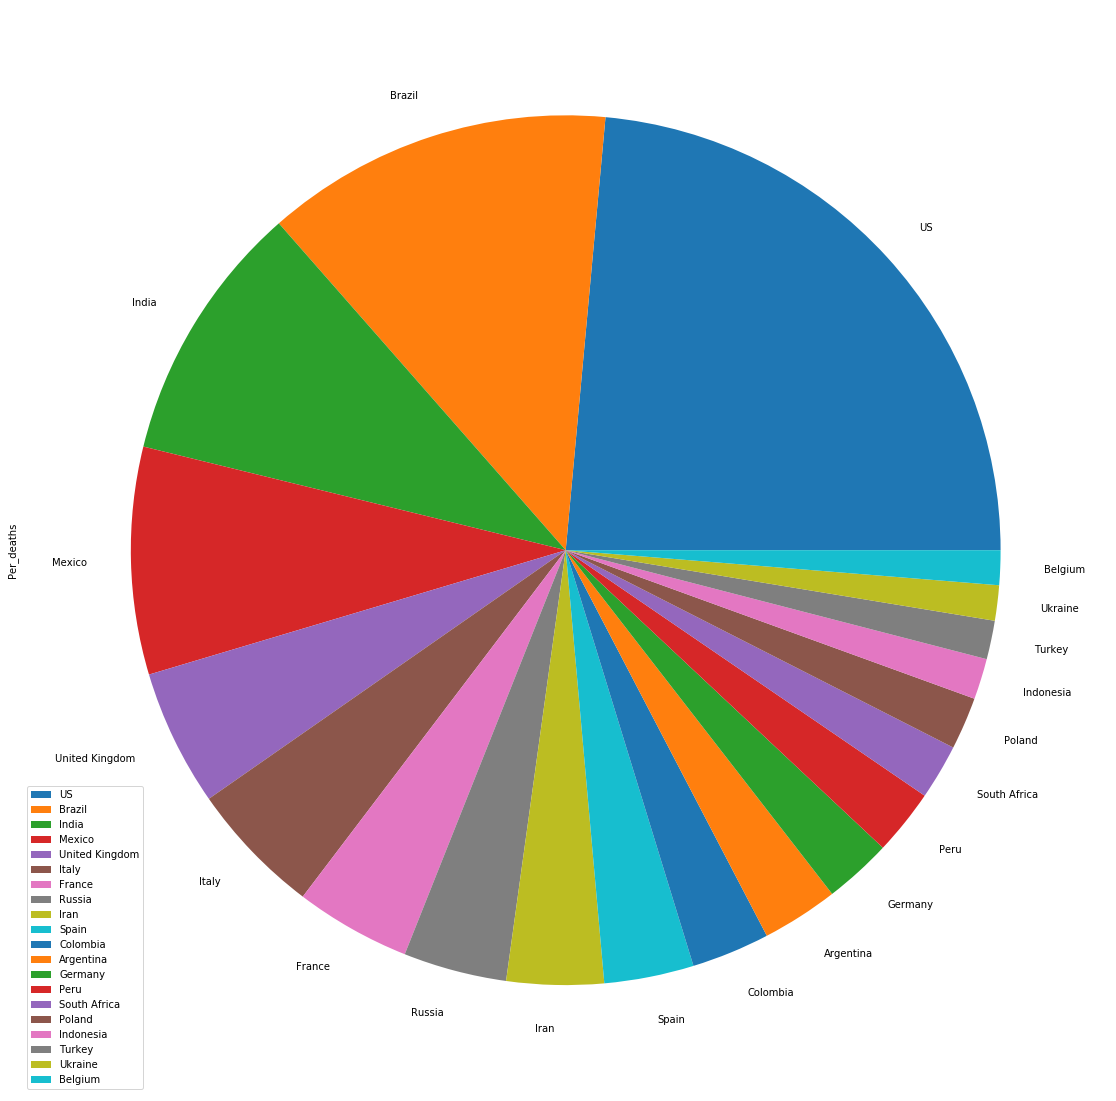

In [179]:
# Definir tamanho de tela com figsize
minha_figura = plt.figure(figsize=(20,20))
ax = minha_figura.add_subplot(111)

df_to_plot[['Per_deaths']].plot.pie(y='Per_deaths', ax=ax)

## Você pode definir onde cada imagem vai ficar antes de passar pro pandas

#### Gerar os dados

In [181]:
# Número de casos acumulados no brasil ao longo do tempo
df_brazil = df[df['Country']=='Brazil']

In [183]:
df_brazil

Date Country  Confirmed  Recovered  Deaths
8096 2020-01-22  Brazil          0          0       0
8097 2020-01-23  Brazil          0          0       0
8098 2020-01-24  Brazil          0          0       0
8099 2020-01-25  Brazil          0          0       0
8100 2020-01-26  Brazil          0          0       0
...         ...     ...        ...        ...     ...
8443 2021-01-03  Brazil    7733746    6904172  196018
8444 2021-01-04  Brazil    7753752    6950045  196561
8445 2021-01-05  Brazil    7810400    6994845  197732
8446 2021-01-06  Brazil    7873830    7033286  198974
8447 2021-01-07  Brazil    7961673    7081521  200498

[352 rows x 5 columns]

In [186]:
df_brazil['Deaths_daily'] = df_brazil['Deaths'].diff()

/home/mazza/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


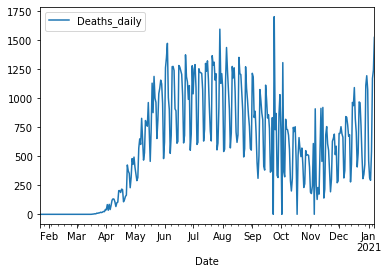

In [189]:
df_brazil.plot(x='Date', y='Deaths_daily')

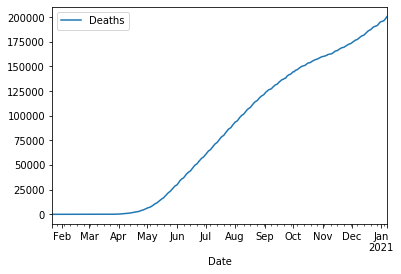

In [190]:
df_brazil.plot(x='Date', y='Deaths')

### Como colocar os dois gráficos lado a lado?

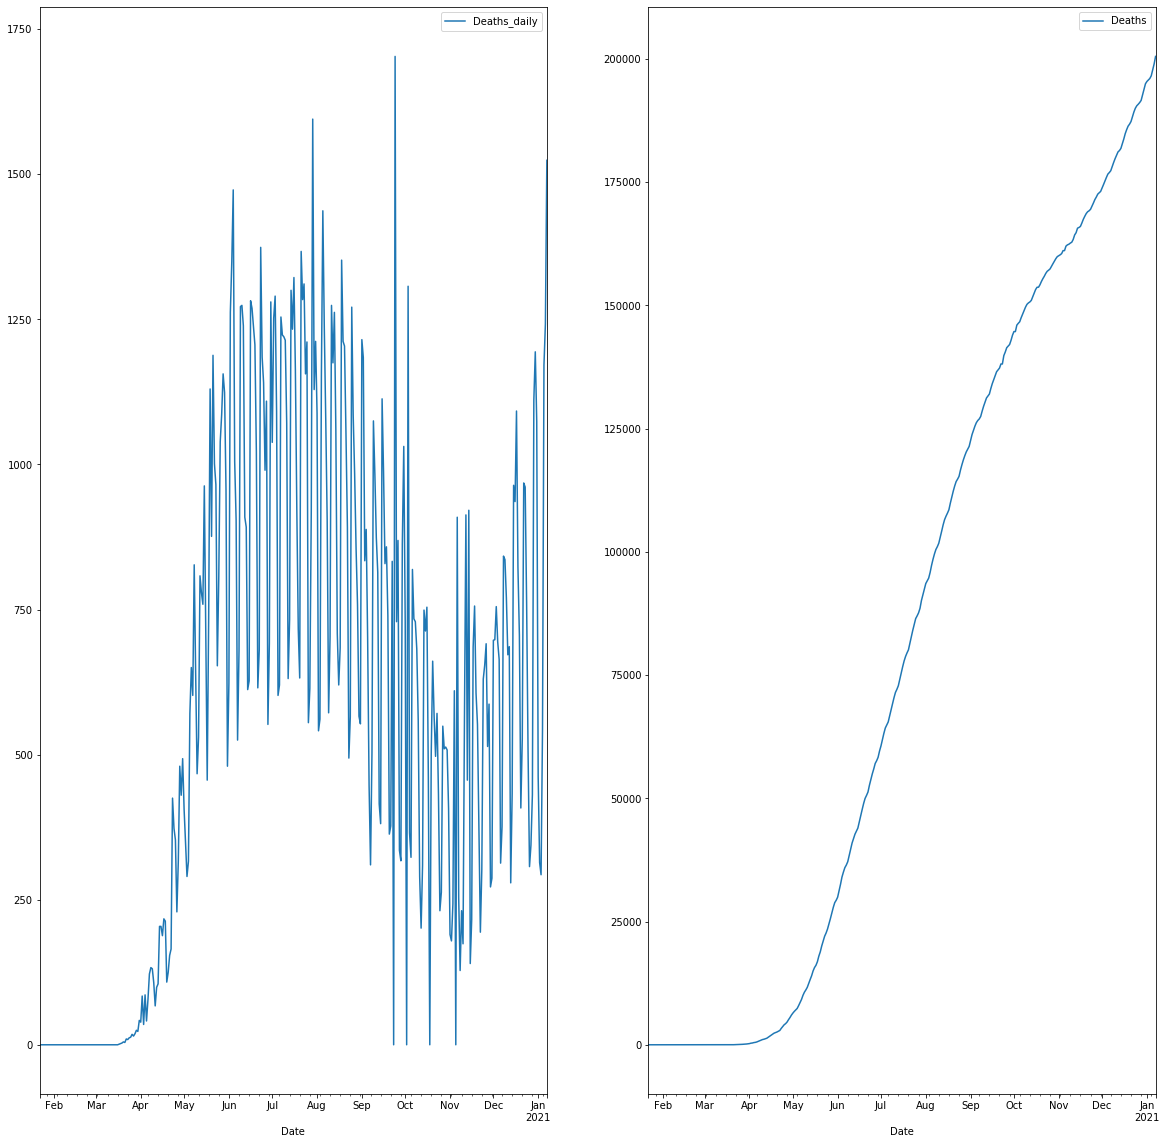

In [192]:
# Definir tamanho de tela com figsize
minha_figura = plt.figure(figsize=(20,20))
ax_1  = minha_figura.add_subplot(121)  # 1 linha 2 colunas imagem 1 (imagem da esquerda)
ax_2  = minha_figura.add_subplot(122)  # 1 linha 2 colunas imagem 2 (imagem da direita)

# Passar o eixo onde você quer o plot do pandas
df_brazil.plot(x='Date', y='Deaths_daily', ax=ax_1)
df_brazil.plot(x='Date', y='Deaths', ax=ax_2)

### Ficou meio ruim, não foi? E se colocássemos uma embaixo da outra (2 linhas e 1 coluna)

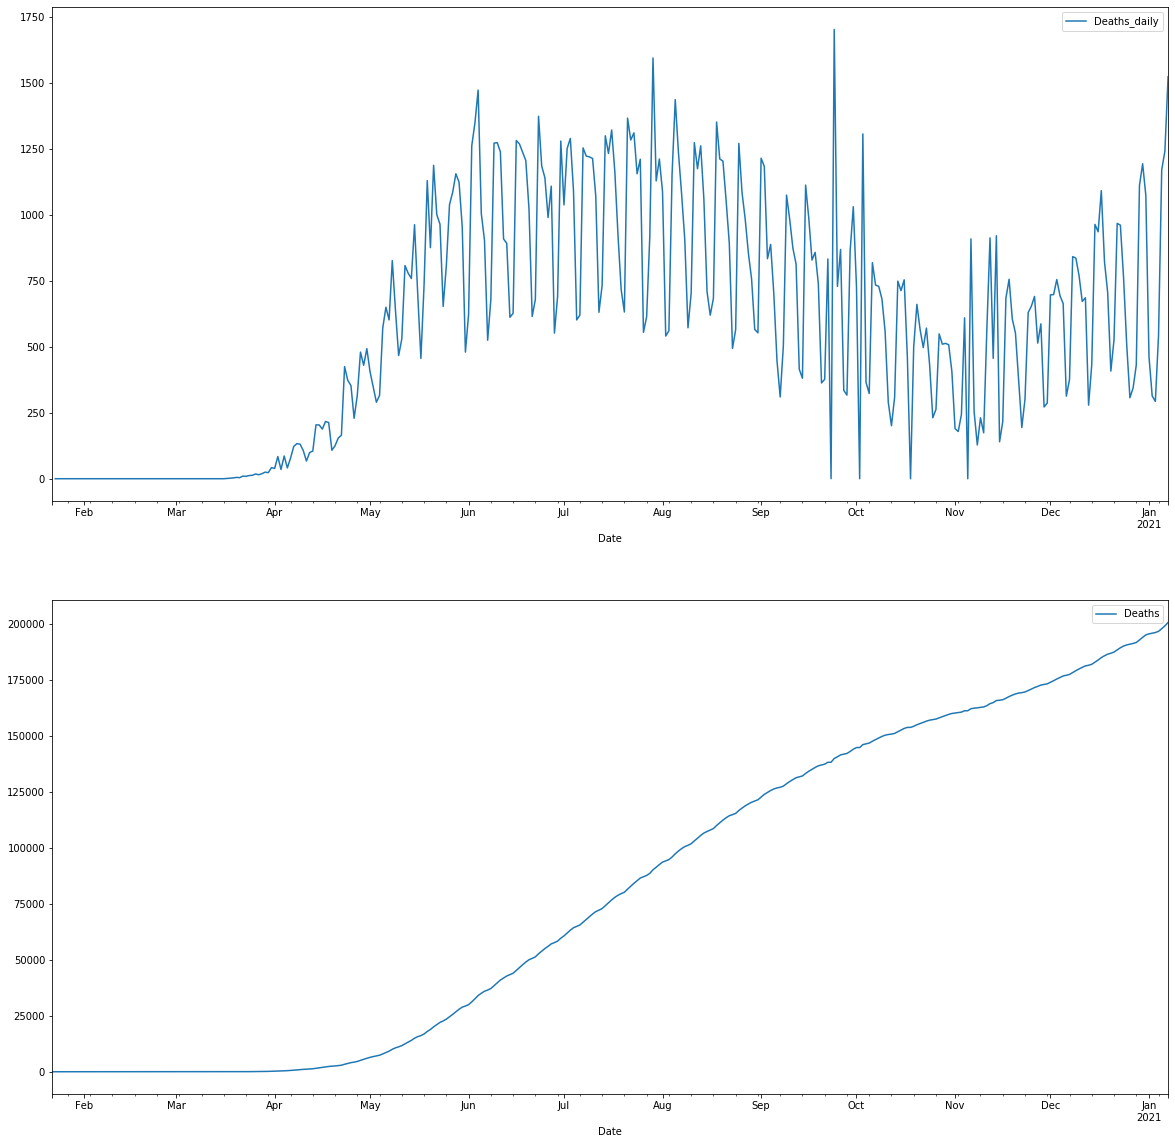

In [194]:
# Definir tamanho de tela com figsize
minha_figura = plt.figure(figsize=(20,20))
ax_1  = minha_figura.add_subplot(211)  # 2 linhas 1 coluna imagem 1 (imagem da esquerda)
ax_2  = minha_figura.add_subplot(212)  # 2 linhas 1 coluna imagem 2 (imagem da direita)

# Passar o eixo onde você quer o plot do pandas
df_brazil.plot(x='Date', y='Deaths_daily', ax=ax_1)
df_brazil.plot(x='Date', y='Deaths', ax=ax_2)

In [266]:
def moving_average(pd_series, n=7, fill=0):
    ret = pd.Series(np.zeros(len(pd_series)))
    ret.index = pd_series.index
    for i in range(n):
        ret += pd_series.shift(i, fill_value=fill)
    return ret/n

In [268]:
df_brazil['mv_average'] = moving_average(df_brazil['Deaths_daily'].fillna(0))

/home/mazza/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


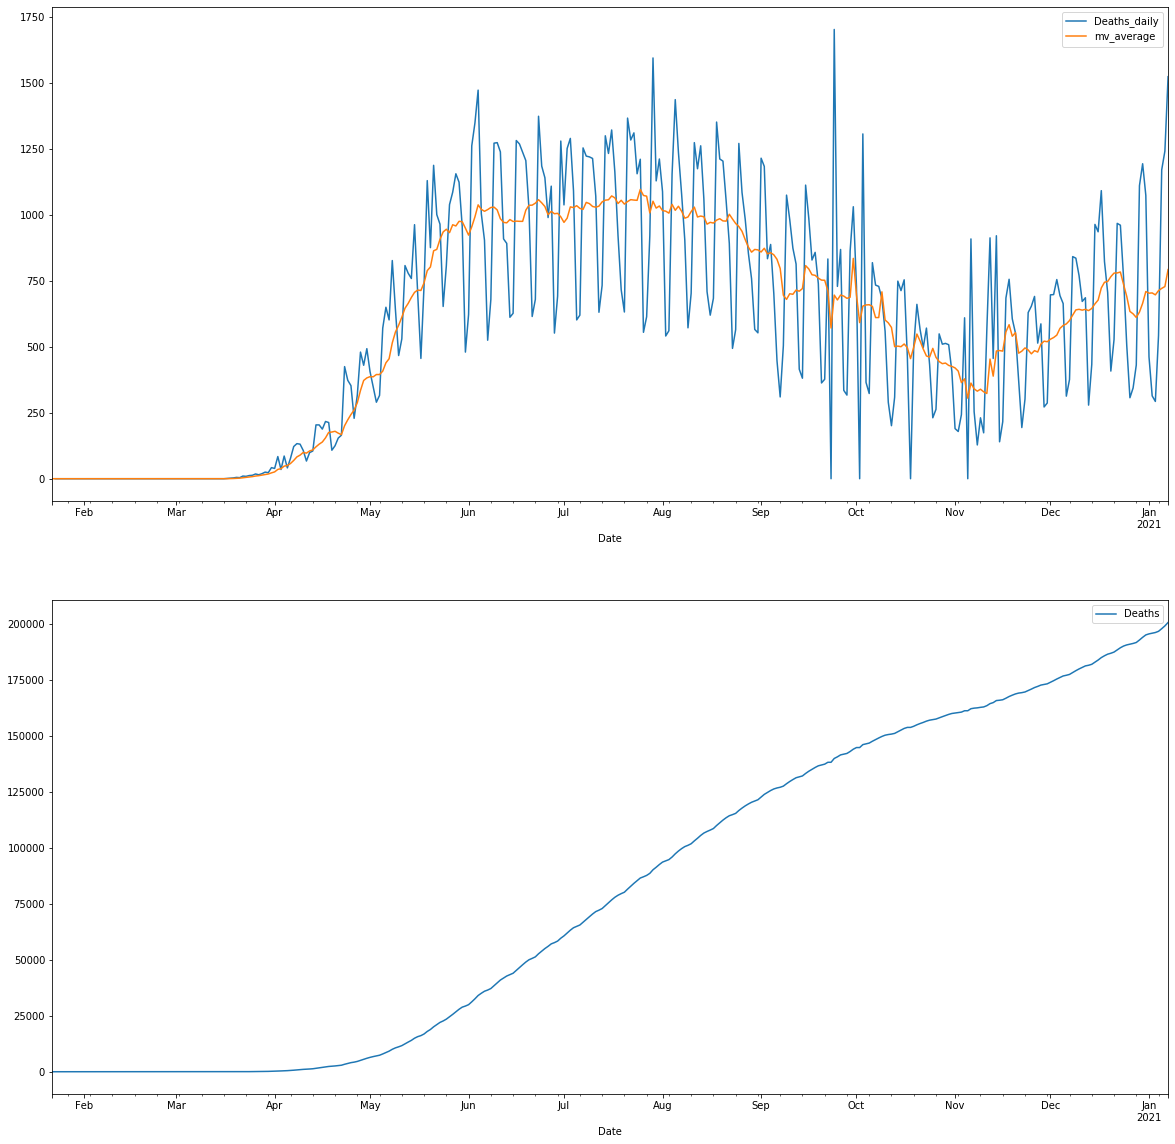

In [269]:
# Definir tamanho de tela com figsize
minha_figura = plt.figure(figsize=(20,20))
ax_1  = minha_figura.add_subplot(211)  # 2 linhas 1 coluna imagem 1 (imagem da esquerda)
ax_2  = minha_figura.add_subplot(212)  # 2 linhas 1 coluna imagem 2 (imagem da direita)

# Passar o eixo onde você quer o plot do pandas
df_brazil.plot(x='Date', y='Deaths_daily', ax=ax_1)
df_brazil.plot(x='Date', y='mv_average', ax=ax_1) # No mesmo eixo do ax_1
df_brazil.plot(x='Date', y='Deaths', ax=ax_2)

## Como tem sido a letalidade do coronavirus ao longo do tempo?

/home/mazza/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


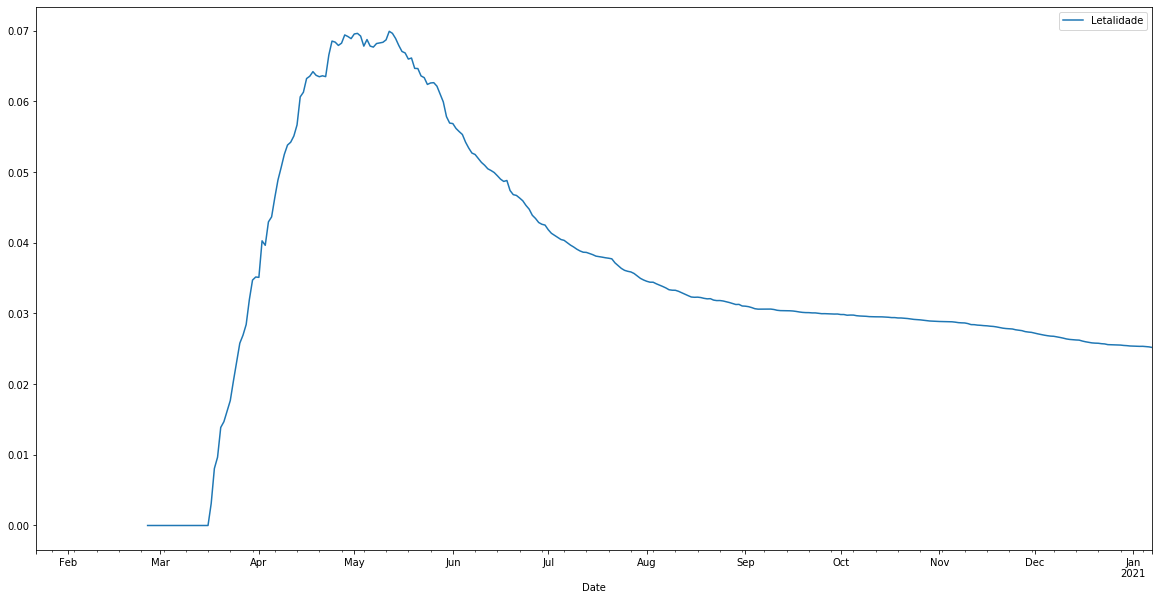

In [280]:
# Definir tamanho de tela com figsize
minha_figura = plt.figure(figsize=(20,10))
ax_1  = minha_figura.add_subplot(111)

# Ignora o atraso entre caso confirmado e morte
df_brazil['Letalidade'] = df_brazil['Deaths'] / df_brazil['Confirmed']
df_brazil.plot.line(x='Date', y='Letalidade', ax=ax_1)

/home/mazza/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


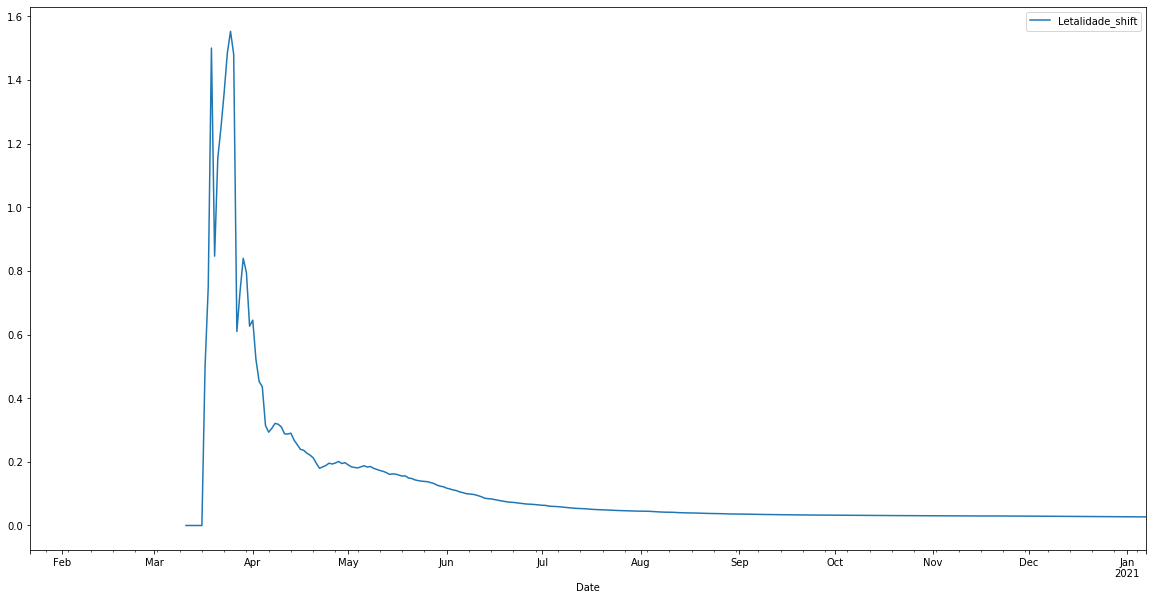

In [281]:
# Definir tamanho de tela com figsize
minha_figura = plt.figure(figsize=(20,10))
ax_1  = minha_figura.add_subplot(111)

# Morte no dia de hoje veio de um caso confirmado do passado
# Assumir tempo médio de 2 semanas
df_brazil['Letalidade_shift'] = df_brazil['Deaths'] / df_brazil['Confirmed'].shift(14, fill_value=0)
df_brazil.plot.line(x='Date', y='Letalidade_shift', ax=ax_1)

### Letalidade acima de 100%? O que pode ter causado isso? Quando começaram as testagens?

In [287]:
df_brazil["Confirmed_shift"] = df_brazil["Confirmed"].shift(14,fill_value=0)

/home/mazza/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [288]:
df_brazil[(df_brazil["Confirmed"].shift(14,fill_value=0) - df_brazil["Deaths"])<0]

Date Country  Confirmed  Recovered  Deaths  Deaths_daily  \
8153 2020-03-19  Brazil        621          2       6           3.0   
8155 2020-03-21  Brazil       1021          2      15           4.0   
8156 2020-03-22  Brazil       1546          2      25          10.0   
8157 2020-03-23  Brazil       1924          2      34           9.0   
8158 2020-03-24  Brazil       2247          2      46          12.0   
8159 2020-03-25  Brazil       2554          2      59          13.0   
8160 2020-03-26  Brazil       2985          6      77          18.0   

      mv_average  Letalidade  Letalidade_shift  Confirmed_shift  
8153    0.857143    0.009662          1.500000                4  
8155    2.142857    0.014691          1.153846               13  
8156    3.571429    0.016171          1.250000               20  
8157    4.857143    0.017672          1.360000               25  
8158    6.428571    0.020472          1.483871               31  
8159    8.000000    0.023101          1.552632               38  
8160   10.142857    0.025796          1.480769               52

### Filtrar letalidade assumindo shift de 2 semanas com dados a partir de junho

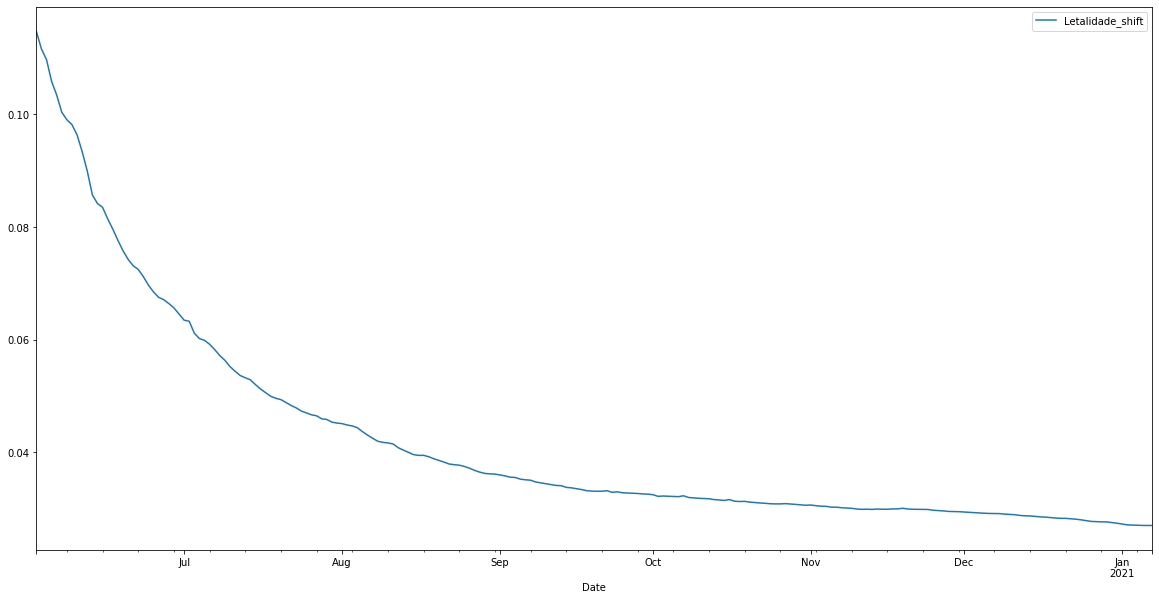

In [289]:
# Definir tamanho de tela com figsize
minha_figura = plt.figure(figsize=(20,10))
ax_1  = minha_figura.add_subplot(111)


df_brazil[df_brazil["Date"]>pd.to_datetime("2020-06-01")].plot.line(x='Date', y='Letalidade_shift', ax=ax_1)

### Adicionar anotação com o valor mais recente

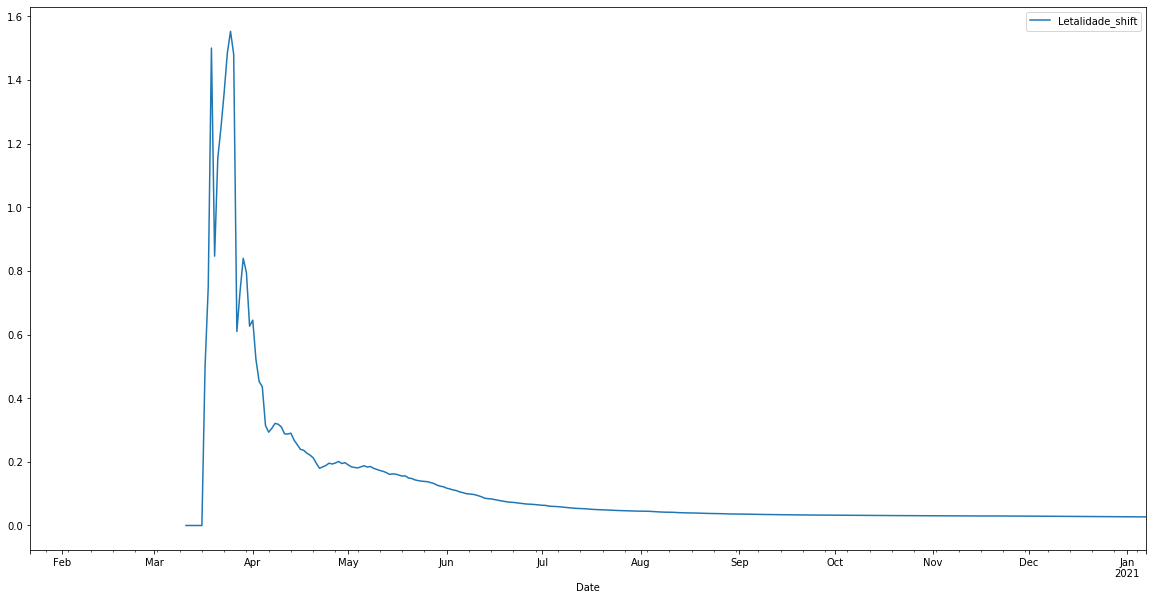

In [313]:
# Definir tamanho de tela com figsize
import matplotlib.dates as mdates

minha_figura = plt.figure(figsize=(20,10))
ax_1  = minha_figura.add_subplot(111)

df_to_plot = df_brazil[df_brazil["Date"]>pd.to_datetime("2020-06-01")]
latest_info = df_to_plot.sort_values(by="Date", ascending=False).iloc[0]
df_brazil.plot.line(x='Date', y='Letalidade_shift', ax=ax_1)
#ax_1.annotate('texto', xy=(df_brazil.index[-1],latest_info.Letalidade_shift))

In [304]:
mdates.date2num(latest_info.Date)''

737797.0

In [309]:
latest_info.Letalidade_shift

0.02700693499210999